## My algorithm

1. make the smallest valid polygon (a triangle)
2. randomly draw a valid point (x,y) position from combination of possible x, y lists
3. if the random vertex is not intersecting with the original polygon:
    * iterate over the list of vertexe's in the original polygon, and see if there is a location it can be placed in the order, which will create a simple polygon (with more sides). If so, place it.
4. repeat step 3 until you have reached a desired number of vertex's in the polygon (or until a try limit is reached).

5. Step 3 will have to be extended with logic to test the linear slopes between vertex's also, to ensure no repeated slope is added...

Note, valid simple polygons could be made from points which intersect. This is probably key to making the smallest possible polygons actually... 

* No repeating points in columns, rows, or angles 

`n = 5
rows = list(range(n))
columns = list(range(n))`

* Create coordinates for a starting polygon (a triangle)
`cs, rows, columns = random_triangle(rows, columns)`

* Check slopes between given coordinates do not repeat
`check_slopes(cs)`

* choose random vertex in n x n and see if it can be added between any coordinates to make a simple polygon

* ensure no duplicate slopes: if so, throw away last change, and try a new random vertex.

* stop when you have reached vertex number = n

* find area of final shape

In [2]:
import copy
import numpy as np
from random import choice
import shapely.geometry as geometry
#import geopandas as gpd
#import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def random_vertex(rows, columns):
    """Return a random vertex from an avaiable list of choices,
    and, after selecting one, remove it from future selection."""
    random_row = choice(rows)
    tmp_rows = copy.deepcopy(rows) 
    tmp_rows.remove(random_row)
    random_column = choice(columns)
    tmp_columns = copy.deepcopy(columns)
    tmp_columns.remove(random_column)
    return (random_row, random_column), tmp_rows, tmp_columns


def random_triangle(rows, columns):
    """Obtain coordinates for a starting shape from a grid of n x n,
    for the simplest valid ploygon: a triangle"""
    area = 0.0
    i = 0
    while area <= 0.0:
        i += 1
        if i > 10:
            raise AssertionError("Halted as I couldn't find valid triangle in 10 attempts.")
        coordinates = []
        while len(coordinates) < 3:
            vertex, rows, columns = random_vertex(rows, columns)
            coordinates.append(vertex)
            coordinates = list(set(coordinates)) # Ensure unique points only
        tmp_poly = geometry.Polygon(coordinates)
        area = tmp_poly.area
    return coordinates, rows, columns


def slope_of_vertexes(vertex1, vertex2):
    """Slope between two xy pairs, calculated as y2-y1/x2-x1"""
    try:
        slope = (vertex2[1] - vertex1[1])/(vertex2[0] - vertex1[0])
    except ZeroDivisionError:
        slope = 0.0
    #print("Slope between {0} and {1} is {2}".format(vertex1, vertex2, slope))
    return slope


def check_slopes(coordinates):
    """Return True if the slopes calculated from a given list of ordered coordinates
    contain no repeats, otherwise return false."""
    slope_list = []
    for i, vertex in enumerate(coordinates):
        #vertex1 = starting_triangle[i-1]
        slope_list.append(slope_of_vertexes(coordinates[i-1] ,vertex))
    assert len(coordinates) == len(slope_list), "slopes were not equal to coordinates"
    if len(set(slope_list)) < len(slope_list):
        #print("Repeated angle present in polygon")
        return False
    else:
        #print("Valid: No repeated angles in polygon")
        return True

In [ ]:
# n = 5
# rows = list(range(n))
# columns = list(range(n))

# cs, rows, columns = random_triangle(rows, columns)
# p = geometry.Polygon(cs)
# print("Polygon area: ", p.area)
# print("Good angles? ", check_slopes(cs))
# p


In [ ]:
def grow_a_polygon(n, print_status=False):
    """Note, no point keeping track of attempted vertexs, because as the
    shape develops, a previously invalid vertex may become valid again.
    Only worth keeping track of last tried vertex?"""
    rows = list(range(1, n+1))
    columns = list(range(1, n+1))
    if print_status:
        print('row, col check:', len(rows), len(columns))
        print("rows:", rows)
        print("columns:", columns)
    # Try and draw a valid triangle to start from
    coordinates = None
    kk = 0
    while not coordinates:
        try:
            coordinates, rows, columns = random_triangle(rows, columns)
        except:
            kk += 1
            if kk > 10:
                raise AttributeError("Unable to find a triangle in 10 attempts")
    if print_status:
        print('row, col check:', len(rows), len(columns))
        print("rows:", rows)
        print("columns:", columns)
    jj = 0
    while len(coordinates) < n:
        if print_status:
            print("\nTop of while head:")
            print(coordinates)
        jj += 1
        if jj > 20:
            if print_status:
                print("Not finished in 20 rolls")
            return None
        if print_status:
            print('poly size:',len(coordinates))
        tmp_vertex, tmp_rows, tmp_columns = random_vertex(rows, columns)
        if print_status:
            print('rows left:',rows,'\n','columns left:',columns)
            print('   trying,', tmp_vertex)
        valid_shape = False
        no_slope_repeats = False
        shape_found = False
        i = 0
        while not shape_found:
            if print_status:
                print("Shape found? ", shape_found)
                print("Trying to place vertex. Attempt {0} of {1}".format(i, len(coordinates)))
            tmp_coordinates = copy.deepcopy(coordinates)
            tmp_coordinates.insert(i, tmp_vertex)
            tmp_poly = geometry.Polygon(tmp_coordinates)
            is_valid_shape = tmp_poly.is_valid
            print("Breaking")
            return tmp_poly
            no_slope_repeats = check_slopes(tmp_coordinates)
            if is_valid_shape and no_slope_repeats:
                if print_status:
                    print("Valid new shape - growing polygon!")
                rows = copy.deepcopy(tmp_rows)
                columns = copy.deepcopy(tmp_columns)
                coordinates = copy.deepcopy(tmp_coordinates)
                shape_found = True
            if i > len(coordinates):
                if print_status:
                    print("No valid shape could be made from ", tmp_vertex)
                shape_found = True # Bail out of while loop
            else:
                i += 1
    return coordinates

In [ ]:
cs = None
n = 23
while not cs:
    cs = grow_a_polygon(n)
    
if cs:
    print("Good slopes?", check_slopes(cs))
    poly = geometry.Polygon(cs)
    print("Area:", poly.area)
    poly
else:
    print("Polygon not created")
poly

In [ ]:
cs.is_valid

In [ ]:
cs.is_valid

In [ ]:
a = cs.is_valid

In [ ]:
cs.is_simple

In [ ]:
cs

In [ ]:
geometry.__file__

In [3]:
c = (22, 18), (16, 5), (18, 8), (21, 14), (23, 19), (20, 21), (15, 16), (19, 17), (6, 6), (5, 9), (3, 10), (10, 20), (7, 13), (11, 22), (4, 23), (1, 12), (2, 7), (9, 2), (12, 3), (8, 4), (14, 11), (13, 1), (17, 15)

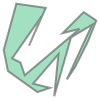

In [4]:
geometry.Polygon(c)

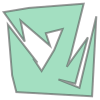

In [28]:
cm = (19, 3), (23, 20), (22, 1), (4, 2), (3, 6), (2, 18), (9, 9), (8, 10), (10, 7), (13, 12), (15, 17), (11, 16), (12, 13), (5, 19), (6, 14), (1, 21), (7, 22), (20, 23), (17, 11), (16, 8), (21, 15), (18, 4), (14, 5)
geometry.Polygon(cm)

In [29]:
geometry.Polygon(cm).area

309.5

In [25]:
from tinydb import TinyDB, where

db = TinyDB('db.json')

In [26]:
a = db.table()

In [27]:
a.all()

[]